### <div class="alert alert-block alert-info"> [Part1] openCV 이미지 마우스 드래그하여 좌표값 알기
- https://house-of-e.tistory.com/entry/9-OpenCV-python-%EB%A7%88%EC%9A%B0%EC%8A%A4-%EB%8F%99%EC%9E%91-%ED%95%A8%EC%88%98-setMouseCallback

In [3]:
import cv2
import numpy as np
img=np.full((300,300,3),255,dtype=np.uint8)

print('종료하시려면 esc키를 누르세요')
cv2.imshow('ttt',img)

while True:
    if cv2.waitKey()==27:
        break
cv2.destroyAllWindows()

종료하시려면 esc키를 누르세요


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#img=np.full((300,300,3),255,dtype=np.uint8)
img=np.zeros((300,300,3),dtype=np.uint8)
img[:,:,:]=255
np.min(img),np.max(img)

(255, 255)

In [16]:
import cv2
import numpy as np

# 새로운 행 400, 열 500의 흑백 이미지 생성
image = np.zeros((400, 500,3), dtype=np.uint8)

def draw_circle(event, x, y, flags, param):
    global image

    if event == cv2.EVENT_LBUTTONDOWN:
        # 마우스 왼쪽 버튼이 클릭되면 반지름 20의 빨간색 원 그리기
        cv2.circle(image, (x, y), 20, (0,0,255), 1)
        cv2.imshow('Image', image)

# 윈도우 생성 및 마우스 이벤트 콜백 함수 등록
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', draw_circle)

while True:
    cv2.imshow('Image', image)
    
    # 'Esc' 키를 누르면 프로그램 종료
    if cv2.waitKey(1) == 27:
        break

cv2.destroyAllWindows()


In [23]:
import cv2
import numpy as np

# 마우스 이벤트 콜백 함수
def draw_rectangle(event, x, y, flags, param):
    global drawing, top_left_pt, bottom_right_pt

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        top_left_pt = (x, y)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        bottom_right_pt = (x, y)

        # 드래그한 영역에 모자이크 처리
        roi = image[top_left_pt[1]:bottom_right_pt[1], top_left_pt[0]:bottom_right_pt[0]]
        blurred_roi = cv2.GaussianBlur(roi, (99, 99), 0)  # 모자이크 효과
        image[top_left_pt[1]:bottom_right_pt[1], top_left_pt[0]:bottom_right_pt[0]] = blurred_roi
        cv2.imshow('Image', image)

# 초기화
drawing = False
top_left_pt, bottom_right_pt = (-1, -1), (-1, -1)

# 이미지 로드
image = cv2.imread('dog.jpg')

# 윈도우 생성 및 마우스 이벤트 콜백 함수 등록
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', draw_rectangle)

while True:
    cv2.imshow('Image', image)

    # 'Esc' 키를 누르면 프로그램 종료
    key = cv2.waitKey(1)
    if key == 27:
        break

cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

# 마우스 이벤트 콜백 함수
def draw_rectangle(event, x, y, flags, param):
    global drawing, top_left_pt, bottom_right_pt

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        top_left_pt = (x, y)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        bottom_right_pt = (x, y)

        # 드래그한 영역에 모자이크 처리
        roi = image[top_left_pt[1]:bottom_right_pt[1], top_left_pt[0]:bottom_right_pt[0]]
        blurred_roi = cv2.GaussianBlur(roi, (99, 99), 0)  # 모자이크 효과
        image[top_left_pt[1]:bottom_right_pt[1], top_left_pt[0]:bottom_right_pt[0]] = blurred_roi
        cv2.imshow('Image', image)

# 초기화
drawing = False
top_left_pt, bottom_right_pt = (-1, -1), (-1, -1)

# 이미지 로드
image = cv2.imread('dog.jpg')

# 윈도우 생성 및 마우스 이벤트 콜백 함수 등록
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', draw_rectangle)

while True:
    cv2.imshow('Image', image)

    # 'Esc' 키를 누르면 프로그램 종료
    key = cv2.waitKey(1)
    if key == 27:
        break

cv2.destroyAllWindows()

### <div class="alert alert-block alert-info"> [Part2] 사용자가 드래그하여 사각형 그리기
-  아래를 실행하면 마우스로 드래그한 영역에 사각형이생성됨
    - 마우스 클릭, 드래그등 어떠한 액션이 있을때 동작하는 작업을 이벤트라함
    - global 함수에 대한 이해가 필요하면   def 함수가 끝나면 변수값이 사라지는 지역변수와, def가 끝나도 변수값이 남아있는 전역변수에 대해 알아야함 
        - https://wikidocs.net/62

-(참고) ASCII코드 <br> 
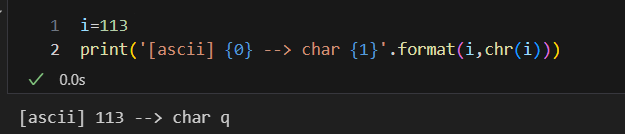



In [2]:
##################################################
###  이 코드는 실행하여 왼쪽버튼을 눌러 드래그 하면 
### 사각형이 생성되고
### c 키를 누르면 원본사진이 다시 불러짐(즉 사각형이 사라짐)
### q 키를 누르면 화면이 종료되면서 사용자가 드래그한 영역이 좌표값으로 표시됨
### 이영역은 '사용자가드래그한영역.csv' 로 저장됨
####################################################

import cv2
import pandas as pd
img_color=cv2.imread('dog.jpg', cv2.IMREAD_COLOR)  

top_left_corner = []                             
bottom_right_corner = []
xy=[]

def drawRectangle(action, x, y, flags, parms):
    global top_left_corner, bottom_right_corner
    if action == cv2.EVENT_LBUTTONDOWN:
        top_left_corner = [(x, y)]
        
        
    elif action == cv2.EVENT_LBUTTONUP:
        bottom_right_corner = [(x, y)]
        
        xy.append([top_left_corner[0], bottom_right_corner[0]])
        cv2.rectangle(image, top_left_corner[0], bottom_right_corner[0], (0, 255, 0),5)
        cv2.imshow("Window", image)

image = cv2.imread("./dog.jpg")
temp = image.copy()    # 원본이미지에 사각형을 그림으로 미리 백업본을 만들어놓음 
cv2.namedWindow("Window")
cv2.setMouseCallback("Window", drawRectangle)

k = 0

while k != 113:  # ord('q')   # q를 입력하면 종료됨
    cv2.imshow("Window", image)
    k = cv2.waitKey(0)
    if (k == 99):            # c 를 입력하면 복사하여 원본 보여줌
        image = temp.copy()
        cv2.imshow("Window", image)

cv2.destroyAllWindows()

df=pd.DataFrame(xy,columns=['top','bottom'])
print(df)
df.to_csv('사용자가드래그한영역.csv')

          top      bottom
0  (322, 313)  (442, 416)
1  (575, 412)  (666, 522)
2  (671, 357)  (763, 407)


### <div class="alert alert-block alert-info"> [Part3] 사용자가 드래그한 영역 모자이크지정
- 모자이크는 그 영역만큼 꺼내서 크기를 크게한뒤 다시 그 크기를 줄여서 원래 크기에 그림을 얹어주어야함.


In [4]:
import cv2
import pandas as pd

top_left_corner = []
bottom_right_corner = []
top=[]
bottom=[]

xy=[]
def drawRectangle(action, x, y, flags, *userdata):

    global top_left_corner, bottom_right_corner,top,bottom,image
  
    if action == cv2.EVENT_LBUTTONDOWN:
        top_left_corner = [(x, y)]
        top=(x,y)
      
  
    elif action == cv2.EVENT_LBUTTONUP:
        bottom_right_corner = [(x, y)]
        bottom=(x,y)
      
        xy.append([top,bottom])
       
        cv2.rectangle(image, top_left_corner[0], bottom_right_corner[0], (0, 255, 0), 2, 8)
      
        tmp=cv2.resize(image[top[1]:bottom[1],top[0]:bottom[0]], (10, 10))
        w=abs(bottom[0]-top[0])
        h=abs(bottom[1]-top[1])
        
        image[top[1]:bottom[1],top[0]:bottom[0]]=cv2.resize(tmp,(w,h))
        cv2.imshow("Window", image)
      
      
image = cv2.imread("dog.jpg")

temp = image.copy()

cv2.namedWindow("Window")

cv2.setMouseCallback("Window", drawRectangle)

k = 0

while k != 113:

    cv2.imshow("Window", image)
    k = cv2.waitKey(0)
   
    if (k == 99):
        image = temp.copy()
        cv2.imshow("Window", image)
        print(top)



cv2.destroyAllWindows()

df=pd.DataFrame(xy,columns=['top','bottom'])
print(df)
df.to_csv('모자이크영역.csv')


          top      bottom
0  (392, 441)  (533, 520)
1  (615, 483)  (783, 550)
2  (445, 517)  (552, 561)
3  (454, 388)  (671, 479)
4  (546, 325)  (762, 412)
5  (726, 340)  (870, 425)
6  (737, 460)  (840, 521)
7  (857, 475)  (951, 536)
8  (803, 446)  (899, 538)
9  (819, 566)  (934, 619)


### <div class="alert alert-block alert-info"> [Part4] 같은 위치의 다른 이미지로 채우기
- 실행하면 dog.jpg 가 실행되고 드래그한 위치에 sample.jpg의 같은 위치의 이미지가 위에 합성됨

In [5]:
import cv2

top_left_corner = []
bottom_right_corner = []
top=[]
bottom=[]
xy=[]


def drawRectangle(action, x, y, flags, *userdata):
    
    global top_left_corner, bottom_right_corner,top,bottom,image
    
    if action == cv2.EVENT_LBUTTONDOWN:
        top_left_corner = [(x, y)]
        top=(x,y)
   
   
    elif action == cv2.EVENT_LBUTTONUP:
        bottom_right_corner = [(x, y)]
        bottom=(x,y)
        
        xy.append([top,bottom])
      
        cv2.rectangle(image, top_left_corner[0], bottom_right_corner[0], (0, 0, 0))
              
        #두번이미지 합성

        image[top[1]:bottom[1],top[0]:bottom[0]]=image2[top[1]:bottom[1],top[0]:bottom[0]]
        cv2.imshow("Window", image)
       
image = cv2.imread("./dog.jpg")

#두번 이미지 불러와서 기존이미지 wxh 사이즈 조절하기
h=image.shape[0]
w=image.shape[1]
image2 = cv2.resize(cv2.imread("./sample.jpg"),(w,h))


temp = image.copy()

cv2.namedWindow("Window")

cv2.setMouseCallback("Window", drawRectangle)

k = 0

while k != 113:

    cv2.imshow("Window", image)
    k = cv2.waitKey(0)

    if (k == 99):
        image = temp.copy()
        cv2.imshow("Window", image)
        print(top)
        
     
cv2.destroyAllWindows()


